In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats

In [3]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [4]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [5]:
boston_df[['CHAS']].value_counts()

CHAS
0.0     471
1.0      35
dtype: int64

[Text(0.5, 1.0, 'Median Value of Owner-Occupied Homes')]

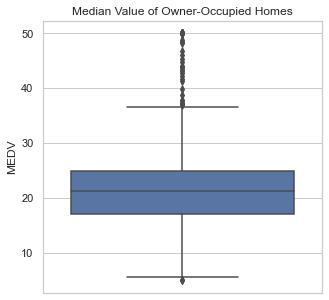

In [6]:
# Visualization for MEDV
plt.figure(figsize=(5,5))
sns.set(style='whitegrid')
sns.boxplot(y='MEDV', data=boston_df).set(title="Median Value of Owner-Occupied Homes")

[Text(0.5, 1.0, 'Charlse River Dummy')]

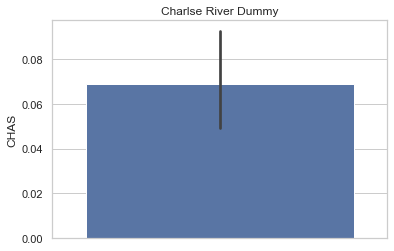

In [35]:
sns.set(style="whitegrid")
sns.barplot(y="CHAS", data=boston_df).set(title='Charlse River Dummy')

**Hypothesis:**

𝐻_0:µ_1=µ_2  ("There is no significant difference in median value of houses bounded by the Charles river ")

𝐻_1:µ_1!=µ_2  ("There ia a significant difference in median value of houses bounded by the Charles river ")   



In [9]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = True)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a significant difference in the mean value of houses bounded by the Charlse river. 

In [10]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and below'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and above'

[Text(0.5, 1.0, 'Median Value vs Proportion of Owner-Occupied Homes'),
 Text(0.5, 0, 'AGE')]

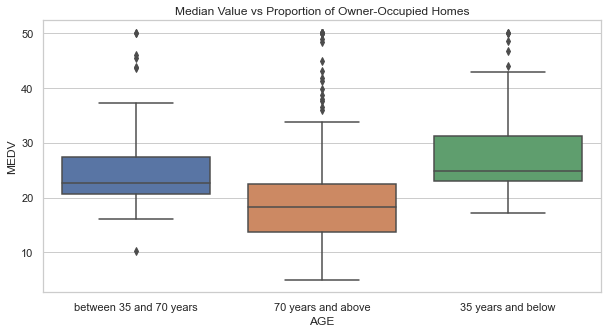

In [11]:
plt.figure(figsize=(10,5))
sns.boxplot(x='age_group', y='MEDV', data=boston_df).set(title='Median Value vs Proportion of Owner-Occupied Homes', xlabel='AGE')


In [12]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and above
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years


**Hypothesis:**

𝐻_0:µ_1=µ_2=µ_3 (The three population means are equal)

𝐻_1: At least one of the means differ

In [46]:
yy = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
by = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
ya = boston_df[boston_df['age_group'] == '70 years and above']['MEDV']


In [54]:
boston_df[['age_group']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age_group  506 non-null    object
dtypes: object(1)
memory usage: 4.1+ KB


In [56]:
# help needed here pls

f_statistic, p_value = scipy.stats.f_oneway(yy, by, ya)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: nan, P-Value: nan


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3621: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '


[Text(0.5, 1.0, ' Nitric Oxide Concentrations vs Proportion of Non-Retail Business Acres per Town'),
 Text(0.5, 0, 'Nitric Oxide Concentrations'),
 Text(0, 0.5, 'Non-Retail Business Acres per Town')]

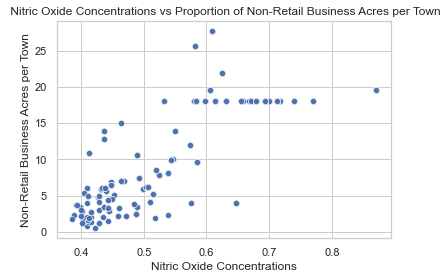

In [29]:
sns.scatterplot(x='NOX', y='INDUS', data=boston_df
               ).set(title=' Nitric Oxide Concentrations vs Proportion of Non-Retail Business Acres per Town', xlabel='Nitric Oxide Concentrations', ylabel="Non-Retail Business Acres per Town")

The plot above indicates that there is a likely positive correlation between the two variables.

**Hypothesis:**

$H\_0:$ There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

$H\_1:$ There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.


In [31]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.763651446920915, 7.913361061239593e-98)

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

[Text(0.5, 1.0, 'Pupil-Teacher Ratio by Town'),
 Text(0.5, 0, 'Pupil-Teacher Ratio')]

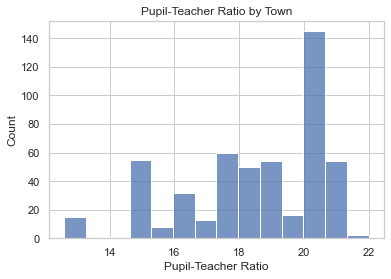

In [41]:
sns.histplot(x='PTRATIO', data=boston_df).set(title='Pupil-Teacher Ratio by Town', xlabel='Pupil-Teacher Ratio')

#### Regression: Impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes.

In [32]:
# independent variable
X = boston_df['DIS']
# dependent variable
y = boston_df['MEDV']

X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 16 Aug 2022   Prob (F-statistic):           1.21e-08
Time:                        11:59:43   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The resulting p-value is less than 0.05, therefore 'Weighted distance to five Boston employment centers' has significance impact on 'Median value of owner-occupied homes in $1000s'. 